In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [5]:
x = df[['flight_day','route','booking_origin','wants_extra_baggage','wants_in_flight_meals','flight_duration']]
y = df['booking_complete']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 6)
(15000, 6)
(35000,)
(15000,)


In [7]:
x_train_num = x_train.select_dtypes(include = ['float64','int64'])
x_test_num = x_test.select_dtypes(include = ['float64','int64'])
print(x_train_num.shape)
print(x_test_num.shape)

(35000, 3)
(15000, 3)


In [8]:
x_train_cat = x_train.select_dtypes(include = ['object'])
x_test_cat = x_test.select_dtypes(include = ['object'])
print(x_train_cat.shape)
print(x_test_cat.shape)

(35000, 3)
(15000, 3)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_num_trans = sc.fit_transform(x_train_num)
x_test_num_trans = sc.transform(x_test_num)
print(x_train_num_trans.shape)
print(x_test_num.shape)

(35000, 3)
(15000, 3)


In [10]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with handle_unknown="ignore"
oe = OneHotEncoder(handle_unknown="ignore")

# Fit on training data
x_train_cat_trans = oe.fit_transform(x_train_cat)

# Transform both train and test data
x_test_cat_trans = oe.transform(x_test_cat)

print(x_train_cat_trans.shape)
print(x_test_cat_trans.shape)


(35000, 869)
(15000, 869)


In [11]:
print(x_train_num_trans.shape)
print(x_train_cat_trans.shape)


(35000, 3)
(35000, 869)


In [12]:
x_train_cat_trans = x_train_cat_trans.toarray()
x_test_cat_trans = x_test_cat_trans.toarray()


In [13]:
import numpy as np

# Ensure both are dense and 2D
x_train_cat_trans = x_train_cat_trans.toarray() if hasattr(x_train_cat_trans, 'toarray') else x_train_cat_trans
x_test_cat_trans = x_test_cat_trans.toarray() if hasattr(x_test_cat_trans, 'toarray') else x_test_cat_trans

# Concatenate along axis 1
x_train_trans = np.concatenate((x_train_num_trans, x_train_cat_trans), axis=1)
x_test_trans = np.concatenate((x_test_num_trans, x_test_cat_trans), axis=1)

print(x_train_trans.shape)
print(x_test_trans.shape)


(35000, 872)
(15000, 872)


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_trans,y_train)

RandomForestClassifier()

In [15]:
y_pred = rf.predict(x_test_trans)
print(y_pred.shape)
print(y_test.shape)

(15000,)
(15000,)


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8292

In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf, x_train_trans, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.82828571 0.82957143 0.82985714 0.82785714 0.83185714]
Average Cross-Validation Score: 0.8294857142857144


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred_test = rf.predict(x_test_trans)

# Output accuracy and classification report
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.8292
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     12706
           1       0.36      0.16      0.22      2294

    accuracy                           0.83     15000
   macro avg       0.61      0.55      0.56     15000
weighted avg       0.79      0.83      0.80     15000

Confusion Matrix:
 [[12076   630]
 [ 1932   362]]


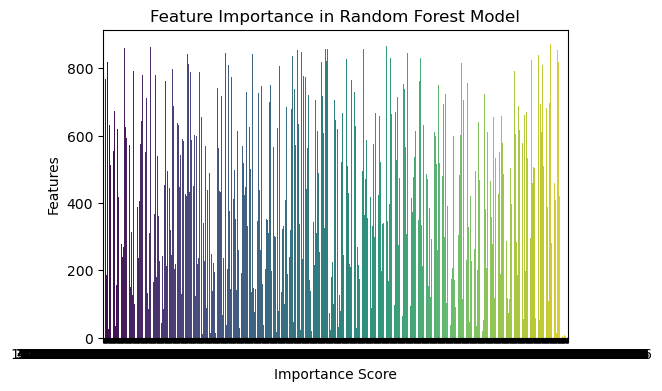

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Retrieve and plot feature importance
feature_importances = pd.Series(rf.feature_importances_) #index=rf.feature_names)
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [26]:
# Save feature importance plot
plt.savefig("feature_importance.png")


<Figure size 640x480 with 0 Axes>